In [67]:
#Importing necessary libraries
import pandas as pd
from pandas.plotting import lag_plot
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [68]:
#Ignoring unharmful warnings
import warnings
warnings.filterwarnings("ignore")

In [69]:
#Reading the dataset
df_milk = pd.read_csv('Data/monthly_milk_production.csv',index_col= ['Date'],parse_dates=True)

In [70]:
#Checking the head of dataset
df_milk.head(6)

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
1962-06-01,697


In [71]:
#Checking the tail of dataset
df_milk.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [72]:
#Evaluating lags at different time intervals
df_milk['lag 1'] = df_milk['Production'].shift(1)
df_milk['lag 2'] = df_milk['Production'].shift(2)
df_milk['lag 3'] = df_milk['Production'].shift(3)
df_milk['lag 4'] = df_milk['Production'].shift(4)

In [73]:
#Reading the head of the dataset
df_milk.head(10)

,Production,lag 1,lag 2,lag 3,lag 4
Date,,,,,
1962-01-01,589,NaN,NaN,NaN,NaN
1962-02-01,561,589.0,NaN,NaN,NaN
1962-03-01,640,561.0,589.0,NaN,NaN
1962-04-01,656,640.0,561.0,589.0,NaN
1962-05-01,727,656.0,640.0,561.0,589.0
1962-06-01,697,727.0,656.0,640.0,561.0
1962-07-01,640,697.0,727.0,656.0,640.0
1962-08-01,599,640.0,697.0,727.0,656.0
1962-09-01,568,599.0,640.0,697.0,727.0


In [74]:
#Generating correlation coefficients on several lag values
df_milk.corr()

,Production,lag 1,lag 2,lag 3,lag 4
Production,1.000000,0.900796,0.795652,0.638010,0.503017
lag 1,0.900796,1.000000,0.901110,0.794940,0.636945
lag 2,0.795652,0.901110,1.000000,0.901184,0.794740
lag 3,0.638010,0.794940,0.901184,1.000000,0.900940
lag 4,0.503017,0.636945,0.794740,0.900940,1.000000


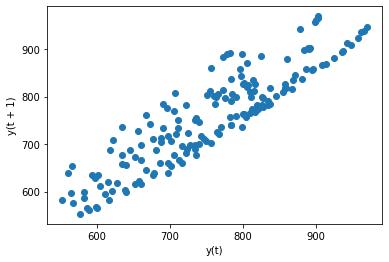

In [75]:
#Plotting graph between Producion column and lag1 column
lag_plot(df_milk['Production'],lag=1);

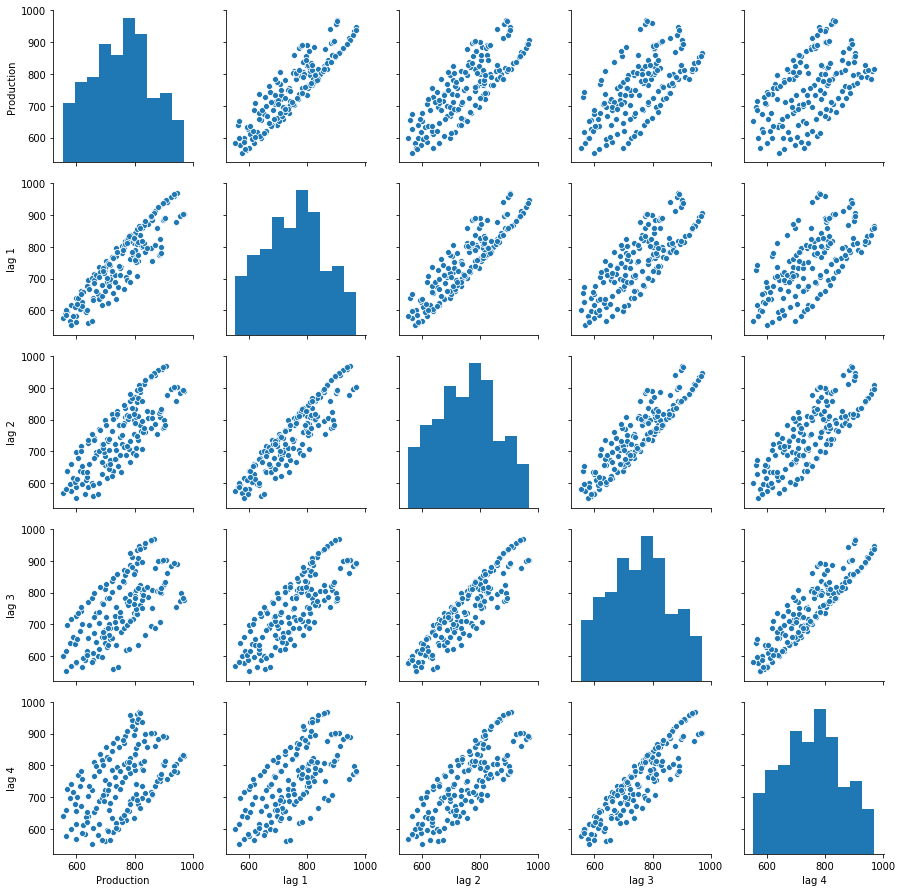

In [76]:
#Plotting correlation graphs at different lags
sns.pairplot(df_milk)

From these graphs we can clearly say that the Time Series is not Stationary and exhibits Autocorrelation

In [77]:
#Checking Autocorrelation using  Stats library
df_milk_stat = pd.read_csv('Data/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df_milk_stat.index.freq = 'MS'

In [78]:
#Auto correlation function 
acf(df_milk_stat['Production'],nlags = 20)

array([1.        , 0.89157378, 0.77817897, 0.62027149, 0.48666361,
       0.4281481 , 0.37606367, 0.41477252, 0.45425153, 0.56181499,
       0.68655906, 0.76855255, 0.84491352, 0.74498717, 0.63766681,
       0.4896786 , 0.36355484, 0.30594908, 0.25490794, 0.28742069,
       0.32056924])

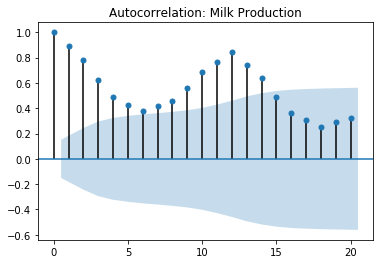

In [79]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Milk Production'
lags = 20
plot_acf(df_milk_stat,title=title,lags=lags);

Clearly the Time Series has Autocorrelation and it is not Stationary

In [82]:
#Another Example to check Stationarity
df_births = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df_births.index.freq = 'D'

In [87]:
df_births.head(5)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [85]:
#Auto correlation function 
acf(df_births['Births'],nlags = 20)

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107])

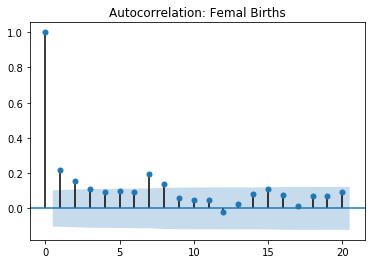

In [86]:
# Now let's plot the autocorrelation at 20 lags
title = 'Autocorrelation: Femal Births'
lags = 20
plot_acf(df_births,title=title,lags=lags);

Clearly there is no Autocorrelation and Time series is Stationary